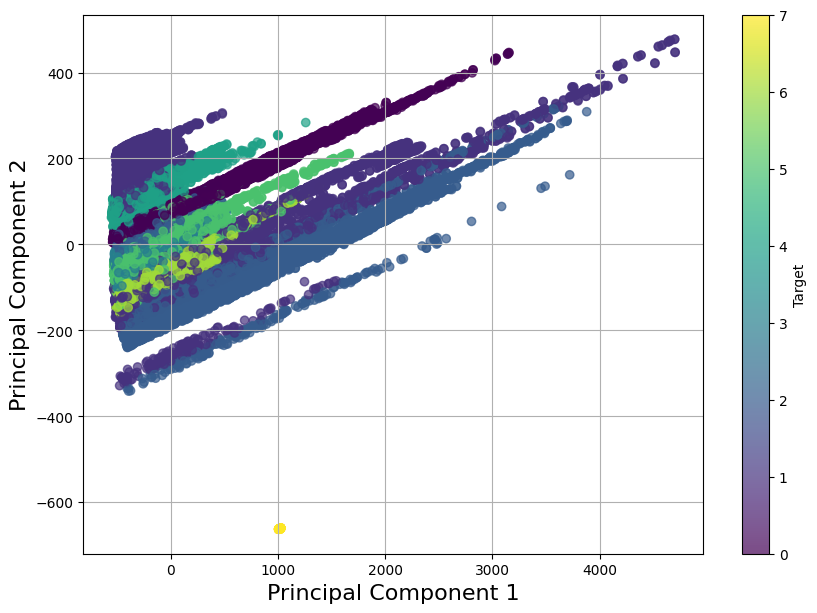

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# Load the data
data = pd.read_csv(r"C:/Users/aidan/codeprojects/ML/ArduinoWineSniffer/ML/WineCSVs/Train/DistinctDataset/DistinctDataset_combined_cleaned_data.csv",
)

data = data.drop(['yyyy-mm-dd timestamp', 'BMPTemperature', 'Pressure(Pa)', 'DHTTemperature', 'Humidity'], axis=1)

# Separate features and target
X = data.drop('Target', axis=1)
y = data['Target']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting the PCA-transformed data
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, ticks=range(len(label_encoder.classes_)), label='Target')
# Set axis labels and title with increased font sizes
plt.xlabel('Principal Component 1', fontsize=16)  # Change fontsize as needed
plt.ylabel('Principal Component 2', fontsize=16)  # Change fontsize as needed
# plt.title('PCA of MQ and Environmental Sensor Data', fontsize=18)  # Change fontsize as needed

plt.grid()
plt.show()


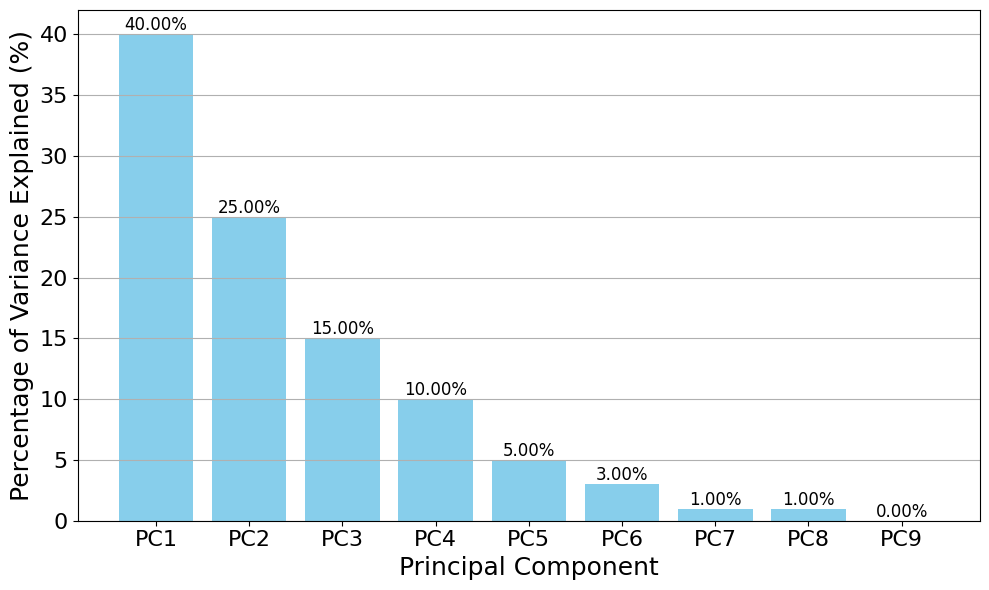

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Example variance ratio values (replace these with your actual PCA results)
# Assume this is the explained variance ratio from PCA
explained_variance_ratio = np.array([0.40, 0.25, 0.15, 0.10, 0.05, 0.03, 0.01, 0.01, 0.00])

# Calculate percentage values
percentages = explained_variance_ratio * 100

# PC numbers
pc_numbers = [f'PC{i+1}' for i in range(len(percentages))]

# Create a bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(pc_numbers, percentages, color='skyblue')

# Annotate the bars with percentage values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom', fontsize=12)

# Set x and y axis labels
plt.xlabel('Principal Component', fontsize=18)
plt.ylabel('Percentage of Variance Explained (%)', fontsize=18)

# Adjust the font size for tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show the plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()
